### Energy-loss timescale vs. secondary CR electron energy

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math
from astropy import units as u
from astropy.constants import c, m_e, sigma_T, alpha

In [3]:
# magnetic field - density relation 
def B(n):
    
    n1 = 300 #cm^-3
    B_ICM = (10 * u.uG).to(u.G)
    q = 2/3
    
    if n <= n1:
        return B_ICM.value
    else:
        return B_ICM.value * (n / n1)**q

In [21]:
E_e_array = np.logspace(-3, 6, 1000)

n = 10
n_ion = 8.7*10**-8 * (10**-16 / 10**-17)**(1/2) * (n*u.cm**-3/(10**5*u.cm**-3))**(-1/2) * n*u.cm**-3

# energy loss timescale
tau_rad = np.zeros_like(E_e_array)
tau_sync = np.zeros_like(E_e_array)
tau_ff = np.zeros_like(E_e_array)
tau_c = np.zeros_like(E_e_array)
f_c = np.zeros_like(E_e_array)

for i in np.arange(len(E_e_array)):
    E_e = E_e_array[i]
    #print(i, E_e)
    
    # coefficient of E_e
    U_rad = 0.26*u.eV*u.cm**-3
    U_mag = ((B(n)**2 / (8 * math.pi))*u.erg*u.cm**-3).to(u.eV*u.cm**-3)
    
    K_rad = ((4/3) * sigma_T / (m_e**2 * c**3) * U_rad).to(1 / (u.GeV * u.Myr))
    K_sync = ((4/3) * sigma_T / (m_e**2 * c**3) * U_mag).to(1 / (u.GeV * u.Myr))
    K_ff = (alpha * c * sigma_T * n_ion).to(1/u.Myr)
    K_c = (30 * n_ion * m_e * c**3 * sigma_T).to(u.GeV/u.Myr)

    # energy loss timescale
    tau_rad[i] = (K_rad.value * E_e)**-1
    tau_sync[i] = (K_sync.value * E_e)**-1
    tau_ff[i] = (K_ff.value * E_e**0)**-1
    tau_c[i] = (K_c.value * E_e**-1)**-1

    #print(tau_rad[i], tau_sync[i], tau_ff[i], tau_c[i])

    f_c[i] = tau_c[i]**-1 / (tau_c[i]**-1 + tau_rad[i]**-1 + tau_sync[i]**-1 + tau_ff[i]**-1)
    #print(f_c[i])
    #print()

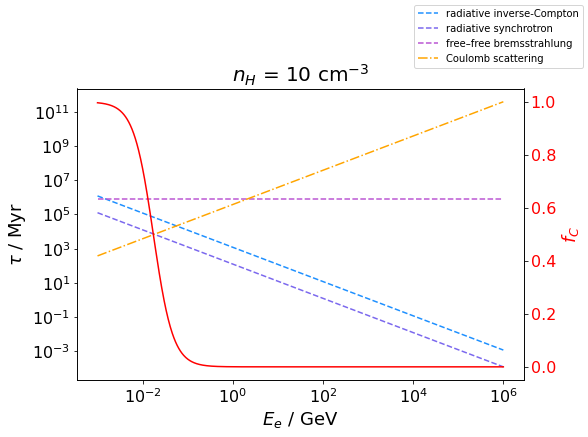

In [23]:
fig, ax1 = plt.subplots(figsize=[8,6]) 

# plotting tau vs. E_e
ax1.loglog(E_e_array, tau_rad, color = 'dodgerblue', linestyle = '--', label = 'radiative inverse-Compton')
ax1.loglog(E_e_array, tau_sync, color = 'mediumslateblue', linestyle = '--', label = 'radiative synchrotron')
ax1.loglog(E_e_array, tau_ff, color = 'mediumorchid', linestyle = '--', label = 'free–free bremsstrahlung') 
ax1.loglog(E_e_array, tau_c, color = 'orange',linestyle = '-.', label = 'Coulomb scattering')

ax1.set_title('$n_H$ = 10 cm$^{-3}$', fontsize = 20)
ax1.set_ylabel(r'$\tau$ / Myr', fontsize = 18)
ax1.set_xlabel('$E_e$ / GeV', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize = 16)
#ax1.set_xlim(0.0005, 1500000)

# plotting thermalization efficiency
ax2 = ax1.twinx() # create another y-axis sharing a common x-axis
ax2.plot(E_e_array, f_c, 'r', linestyle = '-')
ax2.set_ylabel('$f_C$', color = 'red', fontsize = 18)
ax2.set_ylim(-0.05, 1.05)
ax2.tick_params(axis = 'y', labelcolor = 'red', labelsize = 16)

fig.subplots_adjust(top = 0.8)
fig.legend()
plt.savefig('(10 cm^-3) tau vs. E_e.pdf')